In [13]:
import pandas as pd

column_names = [
    'area', 'perimeter', 'compactness',
    'kernel_length', 'kernel_width',
    'asymmetry_coeff', 'kernel_groove_len',
    'class_label'
]

df = pd.read_csv('seeds_dataset.txt', delimiter='\t', on_bad_lines='skip', header=None, names=column_names)
df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_len,class_label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [10]:
# 결측치 확인인
df.isna().sum()

15.26    0
14.84    0
0.871    0
5.763    0
3.312    0
2.221    0
5.22     0
1        0
dtype: int64

In [26]:
X = df.drop(columns='class_label')
Y= df['class_label']
Y = pd.get_dummies(Y)
Y

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
194,False,False,True
195,False,False,True
196,False,False,True
197,False,False,True


In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

print(y_train.shape)

(159, 3)


In [30]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(64, input_shape=(7,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

c:\Users\jshan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,171 (12.39 KB)

 Trainable params: 3,171 (12.39 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# 모델 학습 및 예측
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=16, validation_split= 0.2)
y_pred = model.predict(X_test)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.3567 - loss: 2.1373 - val_accuracy: 0.5000 - val_loss: 1.4724
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4776 - loss: 1.1409 - val_accuracy: 0.5312 - val_loss: 1.0395
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5128 - loss: 1.0367 - val_accuracy: 0.4375 - val_loss: 1.0439
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5991 - loss: 1.0252 - val_accuracy: 0.4688 - val_loss: 1.0290
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6316 - loss: 1.0096 - val_accuracy: 0.5000 - val_loss: 1.0264
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6314 - loss: 0.9825 - val_accuracy: 0.5000 - val_loss: 0.9905
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5895 - loss: 0.9692 - val_accuracy: 0.5000 - val_loss: 0.9774
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6051 - loss: 0.9441 - val_accuracy: 0.5625 - val_loss: 0.9724


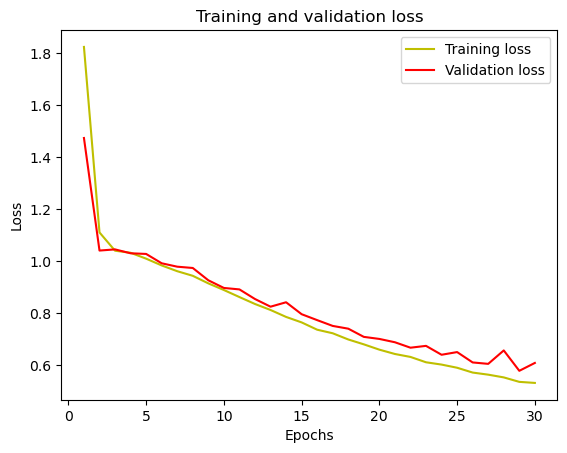

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.legend()
plt.show()

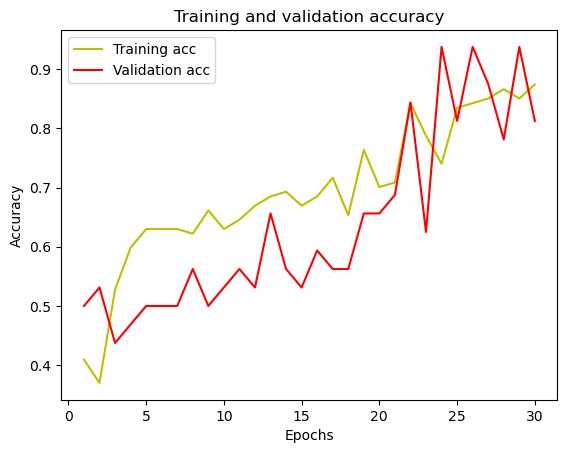

In [33]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()